In [1]:
import pandas as pd
from pathlib import Path

# ---------- CONFIG ----------
BASE = "https://raw.githubusercontent.com/DieckmannDaniel/Git_energy_model/refs/heads/main/results_v2"

# known files and separators
FILES = {
    "cost_breakdown.csv": "\t",
    "end_use.csv": "\t",
    "energy_output.csv": "\t",
    "gwp_breakdown.csv": "\t",
    "installed_technologies.csv": "\t",
    "losses.csv": "\t",
    "monthly_operation.csv": "\t",
    "performance.csv": "\t",
    "shares.csv": "\t",
    "storage.csv": "\t",
    "sankey/input2sankey.csv": ",",  # comma-separated, subfolder
}

def download_run_data(run_name: str, base: str = BASE) -> dict:
    """
    Downloads all model CSVs for a given run name into pandas DataFrames.
    Returns a dict like:
    {
        'TOTEX_min_baseline_cost_breakdown': DataFrame,
        'TOTEX_min_baseline_end_use': DataFrame,
        ...
    }
    """
    dfs = {}
    for rel_path, sep in FILES.items():
        url = f"{base.rstrip('/')}/{run_name}/{rel_path}"
        key = f"{run_name}_{Path(rel_path).stem}"  # e.g. TOTEX_min_baseline_cost_breakdown
        try:
            df = pd.read_csv(url, sep=sep, header=0)
            dfs[key] = df
            print(f"✅ Loaded: {key}")
        except Exception as e:
            print(f"[WARN] Could not load {url}: {e}")
    return dfs


In [9]:
# ---------- USAGE ----------
if __name__ == "__main__":
    runs = [
        "Task5_baseline_TOTEX_results",
        "Task5_baseline_GWP_results",
        "Task5_GWP_1_results",
        "Task5_GWP_2_results",
        "Task5_GWP_3_results",
        "Task5_GWP_4_results",
        "Task5_GWP_5_results",
        "Task5_GWP_6_results",
        "Task5_TOTEX_1_results",
        "Task5_TOTEX_2_results",
        "Task5_TOTEX_3_results",
        "Task5_TOTEX_4_results",
        "Task5_TOTEX_5_results",
        "Task5_TOTEX_6_results"
    ]

    all_data = {}
    for run in runs:
        all_data.update(download_run_data(run))

    # Example access:
    TOTEX_min_baseline_cost_breakdown = all_data["Task5_baseline_GWP_results_cost_breakdown"]
    display(TOTEX_min_baseline_cost_breakdown.head())

✅ Loaded: Task5_baseline_TOTEX_results_cost_breakdown
✅ Loaded: Task5_baseline_TOTEX_results_end_use
✅ Loaded: Task5_baseline_TOTEX_results_energy_output
✅ Loaded: Task5_baseline_TOTEX_results_gwp_breakdown
✅ Loaded: Task5_baseline_TOTEX_results_installed_technologies
✅ Loaded: Task5_baseline_TOTEX_results_losses
✅ Loaded: Task5_baseline_TOTEX_results_monthly_operation
✅ Loaded: Task5_baseline_TOTEX_results_performance
✅ Loaded: Task5_baseline_TOTEX_results_shares
✅ Loaded: Task5_baseline_TOTEX_results_storage
✅ Loaded: Task5_baseline_TOTEX_results_input2sankey
✅ Loaded: Task5_baseline_GWP_results_cost_breakdown
✅ Loaded: Task5_baseline_GWP_results_end_use
✅ Loaded: Task5_baseline_GWP_results_energy_output
✅ Loaded: Task5_baseline_GWP_results_gwp_breakdown
✅ Loaded: Task5_baseline_GWP_results_installed_technologies
✅ Loaded: Task5_baseline_GWP_results_losses
✅ Loaded: Task5_baseline_GWP_results_monthly_operation
✅ Loaded: Task5_baseline_GWP_results_performance
✅ Loaded: Task5_baseline_

,Technology,C_inv [MCHF/y],C_maint [MCHF/y]
0,PV,2059.416505,1723.901861
1,WIND,743.561476,169.460000
2,HYDRO_DAM,1905.444566,35.780227
3,HYDRO_RIVER,1749.298078,503.580000
4,GEOTHERMAL_ELEC,456.954681,353.400000


In [3]:
Task5_baseline_GWP_results_performance = all_data["Task5_baseline_GWP_results_performance"]
Task5_baseline_GWP_results_performance

,Indicator,Value [MCHF/y]
0,CAPEX,16747.41
1,OPEX,1598.11
2,TOTEX,18345.53
3,Indicator,Value [ktCO2-eq/y]
4,GWP_construction,6408.51
5,GWP_op,1868.82
6,GWP_total,8277.33


In [4]:
Task5_baseline_TOTEX_results_performance = all_data["Task5_baseline_TOTEX_results_performance"]
Task5_baseline_TOTEX_results_performance

,Indicator,Value [MCHF/y]
0,CAPEX,13224.57
1,OPEX,2805.85
2,TOTEX,16030.41
3,Indicator,Value [ktCO2-eq/y]
4,GWP_construction,4563.74
5,GWP_op,11134.23
6,GWP_total,15697.97


In [5]:
# Extract TOTEX value from Task5_baseline_TOTEX_results_performance
TOTEX_min_baseline_totex = Task5_baseline_TOTEX_results_performance[
    Task5_baseline_TOTEX_results_performance['Indicator'] == 'TOTEX'
]['Value [MCHF/y]'].iloc[0]
TOTEX_min_baseline_totex = float(TOTEX_min_baseline_totex)

# Extract TOTEX value from Task5_baseline_GWP_results_performance
GWP_min_baseline_results_totex = Task5_baseline_GWP_results_performance[
    Task5_baseline_GWP_results_performance['Indicator'] == 'TOTEX'
]['Value [MCHF/y]'].iloc[0]
GWP_min_baseline_results_totex = float(GWP_min_baseline_results_totex)

print(f"TOTEX from Task5_baseline_TOTEX_results_performance: {TOTEX_min_baseline_totex}")
print(f"TOTEX from Task5_baseline_GWP_results_performance: {GWP_min_baseline_results_totex}")

TOTEX from Task5_baseline_TOTEX_results_performance: 16030.41
TOTEX from Task5_baseline_GWP_results_performance: 18345.53


In [6]:
totex_constraints = []
for i in range(1, 7):
  constraint_value = GWP_min_baseline_results_totex - (i/7) * (GWP_min_baseline_results_totex - TOTEX_min_baseline_totex)
  totex_constraints.append(constraint_value)
  print(f"Run {i}: {constraint_value}")

Run 1: 18014.79857142857
Run 2: 17684.06714285714
Run 3: 17353.335714285713
Run 4: 17022.604285714286
Run 5: 16691.87285714286
Run 6: 16361.141428571429


In [7]:
# Extract GWP_total value from TOTEX_min_baseline_performance
TOTEX_min_baseline_GWP_total = Task5_baseline_TOTEX_results_performance[
    Task5_baseline_TOTEX_results_performance['Indicator'] == 'GWP_total'
]['Value [MCHF/y]'].iloc[0]
TOTEX_min_baseline_GWP_total = float(TOTEX_min_baseline_GWP_total)

# Extract GWP_total value from GWP_min_baseline_results_performance
GWP_min_baseline_results_GWP_total = Task5_baseline_GWP_results_performance[
    Task5_baseline_GWP_results_performance['Indicator'] == 'GWP_total'
]['Value [MCHF/y]'].iloc[0]
GWP_min_baseline_results_GWP_total = float(GWP_min_baseline_results_GWP_total)

print(f"GWP_total from Task5_baseline_TOTEX_results_performance: {TOTEX_min_baseline_GWP_total}")
print(f"GWP_total from Task5_baseline_GWP_results_performance: {GWP_min_baseline_results_GWP_total}")

GWP_total from Task5_baseline_TOTEX_results_performance: 15697.97
GWP_total from Task5_baseline_GWP_results_performance: 8277.33


In [8]:
gwp_constraints = []
for i in range(1, 7):
  constraint_value_gwp = TOTEX_min_baseline_GWP_total - (i/7) * (TOTEX_min_baseline_GWP_total - GWP_min_baseline_results_GWP_total)
  gwp_constraints.append(constraint_value_gwp)
  print(f"Run {i}: {constraint_value_gwp}")

Run 1: 14637.878571428571
Run 2: 13577.787142857142
Run 3: 12517.695714285714
Run 4: 11457.604285714286
Run 5: 10397.512857142858
Run 6: 9337.42142857143


In [10]:
Task5_GWP_1_results_performance = all_data["Task5_GWP_1_results_performance"]
Task5_GWP_2_results_performance = all_data["Task5_GWP_2_results_performance"]
Task5_GWP_3_results_performance = all_data["Task5_GWP_3_results_performance"]
Task5_GWP_4_results_performance = all_data["Task5_GWP_4_results_performance"]
Task5_GWP_5_results_performance = all_data["Task5_GWP_5_results_performance"]
Task5_GWP_6_results_performance = all_data["Task5_GWP_6_results_performance"]

In [11]:
Task5_TOTEX_1_results_performance = all_data["Task5_TOTEX_1_results_performance"]
Task5_TOTEX_2_results_performance = all_data["Task5_TOTEX_2_results_performance"]
Task5_TOTEX_3_results_performance = all_data["Task5_TOTEX_3_results_performance"]
Task5_TOTEX_4_results_performance = all_data["Task5_TOTEX_4_results_performance"]
Task5_TOTEX_5_results_performance = all_data["Task5_TOTEX_5_results_performance"]
Task5_TOTEX_6_results_performance = all_data["Task5_TOTEX_6_results_performance"]

In [12]:
task5_performance_summary = {}

task5_runs = [
    "Task5_TOTEX_1_results",
    "Task5_TOTEX_2_results",
    "Task5_TOTEX_3_results",
    "Task5_TOTEX_4_results",
    "Task5_TOTEX_5_results",
    "Task5_TOTEX_6_results",
    "Task5_GWP_1_results",
    "Task5_GWP_2_results",
    "Task5_GWP_3_results",
    "Task5_GWP_4_results",
    "Task5_GWP_5_results",
    "Task5_GWP_6_results"
]

for run_name in task5_runs:
    performance_df_name = f"{run_name}_performance"
    if performance_df_name in locals(): # Check if the variable exists
        performance_df = locals()[performance_df_name]
        try:
            # Extract TOTEX
            totex_row = performance_df[performance_df['Indicator'] == 'TOTEX']
            totex = float(totex_row['Value [MCHF/y]'].iloc[0])

            # Extract GWP_total
            gwp_row = performance_df[performance_df['Indicator'] == 'GWP_total']
            gwp_total = float(gwp_row['Value [MCHF/y]'].iloc[0]) # is Value [ktCO2-eq/y] but not the way the table is formatted

            task5_performance_summary[run_name] = {'TOTEX': totex, 'GWP_total': gwp_total}

        except Exception as e:
            print(f"[WARN] Could not extract data for {run_name}: {e}")
    else:
        print(f"[WARN] Dataframe variable not found for: {performance_df_name}")


for run_name, data in task5_performance_summary.items():
    print(f"{run_name}: TOTEX = {data['TOTEX']}, GWP_total = {data['GWP_total']}")

Task5_TOTEX_1_results: TOTEX = 16058.14, GWP_total = 14637.88
Task5_TOTEX_2_results: TOTEX = 16113.56, GWP_total = 13577.79
Task5_TOTEX_3_results: TOTEX = 16233.78, GWP_total = 12517.7
Task5_TOTEX_4_results: TOTEX = 16372.22, GWP_total = 11457.6
Task5_TOTEX_5_results: TOTEX = 16510.99, GWP_total = 10397.51
Task5_TOTEX_6_results: TOTEX = 16684.71, GWP_total = 9337.42
Task5_GWP_1_results: TOTEX = 18014.8, GWP_total = 8303.04
Task5_GWP_2_results: TOTEX = 17684.07, GWP_total = 8358.89
Task5_GWP_3_results: TOTEX = 17353.34, GWP_total = 8430.88
Task5_GWP_4_results: TOTEX = 17022.6, GWP_total = 8695.35
Task5_GWP_5_results: TOTEX = 16691.87, GWP_total = 9309.67
Task5_GWP_6_results: TOTEX = 16361.14, GWP_total = 11542.44


In [13]:
task5_performance_summary

{'Task5_TOTEX_1_results': {'TOTEX': 16058.14, 'GWP_total': 14637.88},
 'Task5_TOTEX_2_results': {'TOTEX': 16113.56, 'GWP_total': 13577.79},
 'Task5_TOTEX_3_results': {'TOTEX': 16233.78, 'GWP_total': 12517.7},
 'Task5_TOTEX_4_results': {'TOTEX': 16372.22, 'GWP_total': 11457.6},
 'Task5_TOTEX_5_results': {'TOTEX': 16510.99, 'GWP_total': 10397.51},
 'Task5_TOTEX_6_results': {'TOTEX': 16684.71, 'GWP_total': 9337.42},
 'Task5_GWP_1_results': {'TOTEX': 18014.8, 'GWP_total': 8303.04},
 'Task5_GWP_2_results': {'TOTEX': 17684.07, 'GWP_total': 8358.89},
 'Task5_GWP_3_results': {'TOTEX': 17353.34, 'GWP_total': 8430.88},
 'Task5_GWP_4_results': {'TOTEX': 17022.6, 'GWP_total': 8695.35},
 'Task5_GWP_5_results': {'TOTEX': 16691.87, 'GWP_total': 9309.67},
 'Task5_GWP_6_results': {'TOTEX': 16361.14, 'GWP_total': 11542.44}}

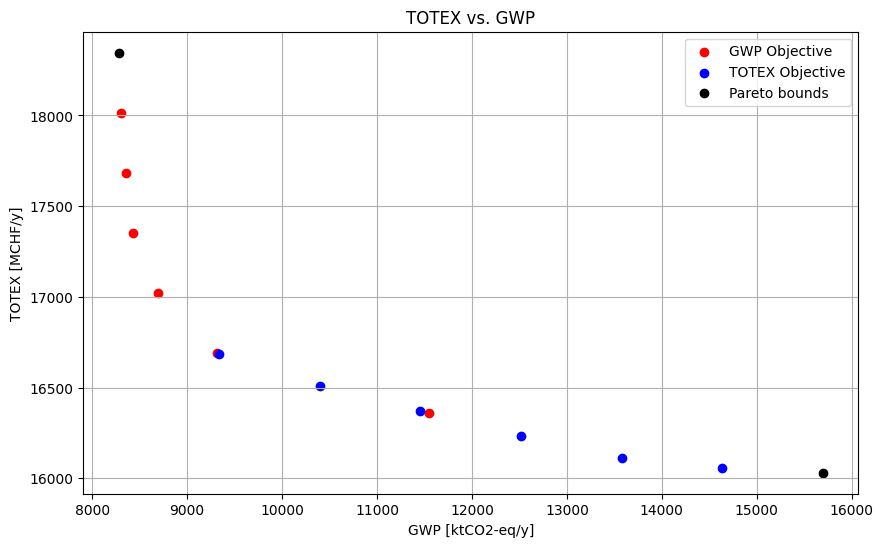

In [15]:
import matplotlib.pyplot as plt

# Extract data for plotting
gwp_x = [data['GWP_total'] for run_name, data in task5_performance_summary.items() if 'Task5_GWP' in run_name]
gwp_y = [data['TOTEX'] for run_name, data in task5_performance_summary.items() if 'Task5_GWP' in run_name]

totex_x = [data['GWP_total'] for run_name, data in task5_performance_summary.items() if 'Task5_TOTEX' in run_name]
totex_y = [data['TOTEX'] for run_name, data in task5_performance_summary.items() if 'Task5_TOTEX' in run_name]

# Pareto bounds
pareto_x = [GWP_min_baseline_results_GWP_total, TOTEX_min_baseline_GWP_total]
pareto_y = [GWP_min_baseline_results_totex, TOTEX_min_baseline_totex]


# Create the scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(gwp_x, gwp_y, color='red', label='GWP Objective')
plt.scatter(totex_x, totex_y, color='blue', label='TOTEX Objective')
plt.scatter(pareto_x, pareto_y, color='black', label='Pareto bounds')


# Add labels and title
plt.xlabel('GWP [ktCO2-eq/y]')
plt.ylabel('TOTEX [MCHF/y]')
plt.title('TOTEX vs. GWP')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()